## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data Sets

In [2]:
path=r'/Users/isabelgonzalez/Desktop/achievement 4'

In [3]:
ords_prods_merge=pd.read_pickle(os.path.join(path, 'data', 'prepared data', 'orders_products_merged_ver3.pkl'))

## Practice

<AxesSubplot:>

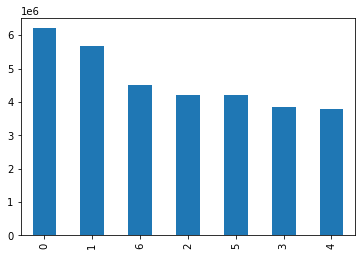

In [4]:
# creating plot chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

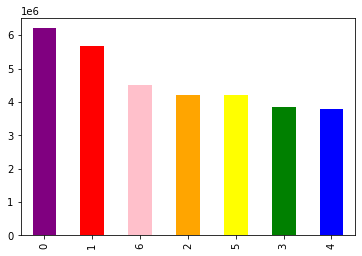

In [5]:
# assigning it a name
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
# saving bar chart
bar.figure.savefig(os.path.join(path, 'analysis','visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

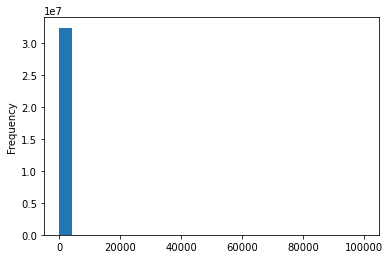

In [8]:
# creating a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

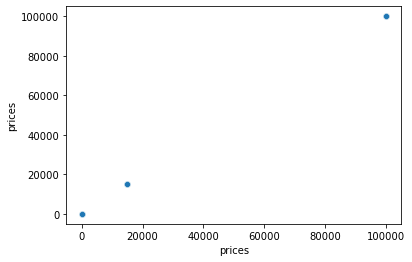

In [9]:
# creating a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [10]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,one_time_customer,product_id,add_to_cart_order,reordered,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order,avg_spent,mean_price_for_orders,spending_flag,median_of_days_since_prior_order,order_frequency_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,Regularly busy,Average orders,4,New customer,1154.792308,High Spender,1154.792308,High Spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,Busiest days,Average orders,4,New customer,1154.792308,High Spender,1154.792308,High Spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,Busiest days,Average orders,16,Regular customer,114.426619,High Spender,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,1106.743956,High Spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,Busiest days,Most orders,39,Regular customer,1106.743956,High Spender,1106.743956,High Spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,Slowest days,Most orders,15,Regular customer,451.153540,High Spender,451.153540,High Spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,Slowest days,Average orders,12,Regular customer,1178.381871,High Spender,1178.381871,High Spender,12.0,Regular customer


In [27]:
# turning outlier values into NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [28]:
# check new max price
ords_prods_merge['prices'].max()

25.0

In [29]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100]

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,one_time_customer,product_id,add_to_cart_order,reordered,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order,avg_spent,mean_price_for_orders,spending_flag,median_of_days_since_prior_order,order_frequency_flag


<AxesSubplot:ylabel='Frequency'>

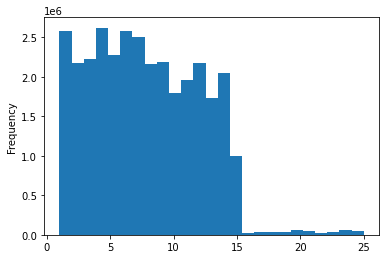

In [13]:
# retrying histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

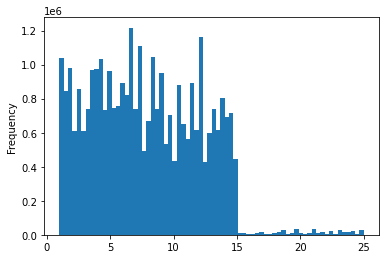

In [14]:
# change to 70 bins
ords_prods_merge['prices'].plot.hist(bins = 70)

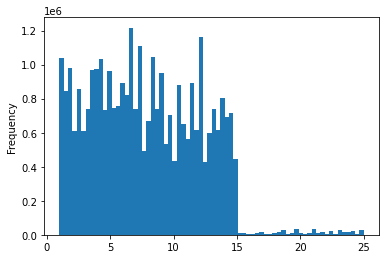

In [16]:
# assinging hist as a name
hist= ords_prods_merge['prices'].plot.hist(bins = 70)

In [17]:
# saving histogram
hist.figure.savefig(os.path.join(path, 'analysis','visualizations', 'hist_prices.png'))

In [30]:
# create a list holding True/False values to the test np.random.rant () <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [35]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [32]:
# Store 30% of the sample in the dataframe small
small= ords_prods_merge[~dev]

In [33]:
len(ords_prods_merge)

32404859

In [34]:
len(big) + len(small)

32404859

In [37]:
# reducing sample to only neccessary columns
df_2 = small[['orders_day_of_week','prices']]

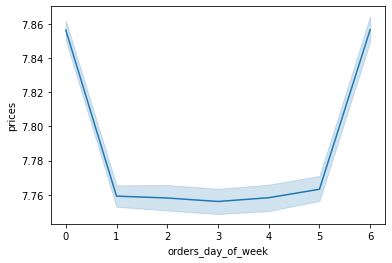

In [38]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [39]:
# Export new file as pkl
ords_prods_merge.to_pickle(os.path.join(path, 'data','prepared Data', 'orders_products_merged_ver4.pkl'))